## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

170500096it [00:50, 4171177.05it/s]                               

![title](data/cifar.PNG)

![title](data/data.PNG)

In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
print(type(trainset))

<class 'torchvision.datasets.cifar.CIFAR10'>


In [18]:
# Loading data in batch size of 4
# If we don't shuffle we might go with same data again and again
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)


In [6]:
print(type(trainloader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [7]:
#dataiter is iterator
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
#(4,3,32,32) --> 4 is batch size, 3 is 3 channel RGB, 32x32 image
print(images[1].shape)
#(3,32,32) --> 3 is 3 channel RGB, 32x32 image
print(labels[1].item())
#5 is index of class so 5 is for dog

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
5


## Visualise data

In [8]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [9]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [10]:
npimg = np.transpose(npimg, (1, 2, 0))
# (1,2,0) --> 
#1 --> first 32, 2 --> 2nd 32 & 0 --> 3
# arranging in that way is require in order to print the image
#so final shape will be 32, 32, 3
print(npimg.shape)


(32, 32, 3)


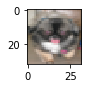

In [11]:
# To reduce size (1,1)
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [12]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

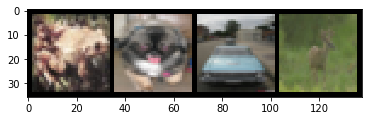

frog dog car deer


In [13]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [14]:
import torch.nn as nn
# We are inheriting from nn.Module
class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        # 3 is number of channels here
        # 16 is number of output channel (so 16 is number of kernel)
        # Kernel of size 3,3
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        #self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [15]:
# Instantiating FirstCNN
net = FirstCNN()

In [16]:
out = net(images)
out.shape
# 4 is batch size
# 16 is output channel, we started with 3 channels but later we have 16 number of kernels
# Image size shrunk to 16x16 or x, y coordinates are reduce to 16x16

torch.Size([4, 16, 16, 16])

In [17]:
for param in net.parameters():
    # When we do nn.conv2d there are certain parameters which are initialize itself
    # For weights --> [16,3,3,3]
    # like 16 is number of kernels
    # 3 is channel
    # 3x3 kernel size
    # For Bias --> [16]
    # 16 is size
    print(param.shape)
    

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [19]:
out1 = out[0, 0, :, :].detach().numpy()
# Here Now we will look into output what we got for out --> torch.Size([4, 16, 16, 16])
# 16 kernels are with 16x16 size we take one of the kernel
print(out1.shape)


(16, 16)


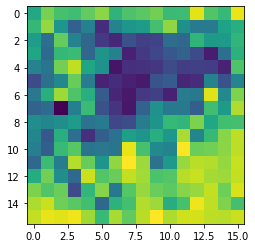

In [20]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [21]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   #(N, 3, 32, 32) -> (N, 8, 30, 30) 8 kernels, 3,3 kernels and without padding
            # # Nbatch,3(RGB),32x32=>(N, 8, 30, 30) 8 kernels, 3,3 kernels and without padding
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
            # 8 should be input as output from first conv is 8
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [22]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

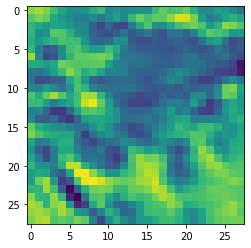

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [24]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [25]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

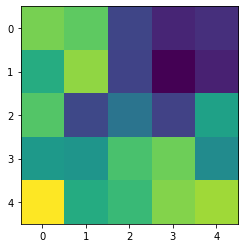

In [26]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

![title](data/lenet.PNG)

In [28]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)   # 3(RGB), 6 No. of kernels, 5x5 kernel size
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)   ==> 16x5x5 = 400
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        # Given particular input we first apply CNN
        x = self.cnn_model(x)
        print(x.shape)
        # Here we are doing flattening for fc model 
        # ==> x.size(0) first index is same that is batch size
        # ==> Rest of them are collapsed and flattened like 16,5,5 to 16x5x5 = 400
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x
# IMPORTANT:
# Important thing to note here is that we haven't use softmax function
# Reason is when we are giving image and to find the class at that time softmax is not essential
# If we see above with fc_model linear we already predicted the class, from maximum value amoung all values
# Softmax is monotonic the maximum value will remain max after applying softmax
# 
# On the other hand when we are doing backpropogation
# We are calculating derivative of loss and there we are doing crossentropy so we need softmax there
# So we will use softmax there

In [29]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [30]:
print(out)

tensor([[-0.0237,  0.0949,  0.0587, -0.1592, -0.0108,  0.0210,  0.0613,  0.0268,
         -0.0173,  0.0345],
        [-0.0227,  0.0844,  0.0576, -0.1300, -0.0088,  0.0436,  0.0598,  0.0446,
          0.0067,  0.0507],
        [-0.0249,  0.0870,  0.0541, -0.1479, -0.0138,  0.0421,  0.0485,  0.0418,
         -0.0025,  0.0414],
        [-0.0197,  0.0883,  0.0666, -0.1407, -0.0036,  0.0470,  0.0659,  0.0399,
         -0.0159,  0.0455]], grad_fn=<AddmmBackward>)


In [31]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([1, 1, 1, 1])


## Training LeNet

In [32]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [33]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
# For test dataset we use train=False, shuffle=False
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [34]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        # Predicting by applying torch.max on dimension 1
        _, pred = torch.max(outputs.data, 1)
        # Total what we have seen
        total += labels.size(0)
        # correct where prediction is equal to labels
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [35]:
net = LeNet()

In [36]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
# Adam need parameters which need to be optimized
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.94, Train acc: 39.06
Epoch: 1/16, Test acc: 42.47, Train acc: 42.72
Epoch: 2/16, Test acc: 46.29, Train acc: 46.71
Epoch: 3/16, Test acc: 48.43, Train acc: 49.37
Epoch: 4/16, Test acc: 49.97, Train acc: 51.30
Epoch: 5/16, Test acc: 51.52, Train acc: 54.06
Epoch: 6/16, Test acc: 52.45, Train acc: 55.45
Epoch: 7/16, Test acc: 53.54, Train acc: 57.38
Epoch: 8/16, Test acc: 53.51, Train acc: 58.08
Epoch: 9/16, Test acc: 53.87, Train acc: 60.07
Epoch: 10/16, Test acc: 53.90, Train acc: 60.44
Epoch: 11/16, Test acc: 54.96, Train acc: 62.06
Epoch: 12/16, Test acc: 54.67, Train acc: 62.22
Epoch: 13/16, Test acc: 55.37, Train acc: 64.03
Epoch: 14/16, Test acc: 55.77, Train acc: 64.64
Epoch: 15/16, Test acc: 55.94, Train acc: 65.71


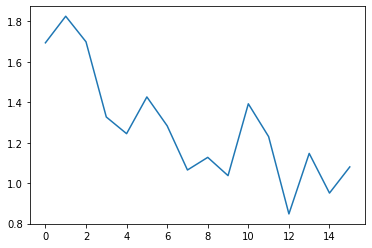

Wall time: 14min 34s


In [37]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):
        #inputs and labels from data
        inputs, labels = data
        # opt to zero grad to remove any previous grad of them
        opt.zero_grad()
        # Now do the forward pass
        outputs = net(inputs)
        # Do loss propogation
        loss = loss_fn(outputs, labels)
        # Backward pass
        loss.backward()
        # Take a step where update the parameters
        # We apply here adam learning rule
        opt.step()
        #Storing each loss
        loss_arr.append(loss.item())
    #Storing loss at each epoch
    loss_epoch_arr.append(loss.item())
    
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [39]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        #inputs and labels to cuda
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [40]:
#Moving Net on GPU
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [41]:
%%time
max_epochs = 16

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        #inputs and labels to GPU
        inputs, labels = inputs.to(device), labels.to(device)
        # All below calculation on GPU
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
Wall time: 2min 14s


In [42]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.94, Train acc: 65.36


## Basic Visualisation

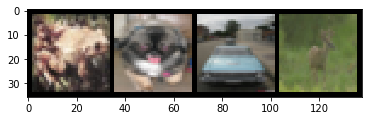

In [43]:
imshow(torchvision.utils.make_grid(images))

In [44]:
net = net.to('cpu')

In [45]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [46]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

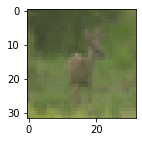

In [47]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

C:\Users\sanve\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


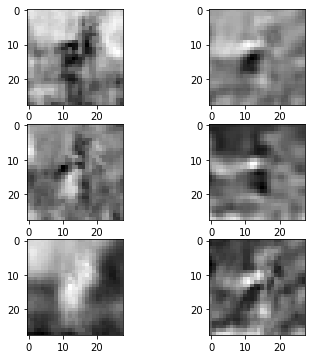

In [48]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Further Exercises

* Modify LeNet to work with ReLU instead of Tanh -> What is the impact on training time, final loss
* We have observed over-fitting -> Use weight_decay in torch.optim to add L2 regularisation
* Instead of CIFAR10, use the MNIST data available from `torchvision.datasets.MNIST`. Download and visualise MNIST data.
* But importantly MNIST images have only 1 channel instead of 3 channels in the case of CIFAR10. Modify LeNet to work with MNIST. Train and find optimised test accuracy.